<a href="https://colab.research.google.com/github/Saquibirtiza/Senti-Stance-Detector/blob/main/CompleteCodeProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convert JSONL to CSV and preprocess the text**

## Clean tweet

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import json
import csv
import io
import re


import nltk
nltk.download('stopwords')

# remove any links from the tweets
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet)  # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')  # remove [links]
    return tweet

# remove the usenames from the tweets
def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)',
                   '', tweet)  # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)',
                   '', tweet)  # remove tweeted at
    return tweet


my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'


# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower()  # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                        if word not in my_stopwords]  # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list]  # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                             for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet


# Opening JSON file and loading the data
# into the variable data

def extract_json(fileobj):
    # Using "with" ensures that fileobj is closed when we finish reading it.
    with fileobj:
        for line in fileobj:
            yield json.loads(line)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Preprocess the tweet



In [ ]:
data_json = io.open('test_single.jsonl', mode='r', encoding='utf-8')
text_json = io.open('test_tweets.jsonl', mode='r', encoding='utf-8')

In [ ]:
# Opens in the JSONL file
data_python = extract_json(data_json)
text_python = extract_json(text_json)

dic = {}
count = 0
for line in text_python:
    id = line.get('id')
    text = line.get('text')
    text = clean_tweet(text)
    dic[id] = text


# now we will open a file for writing
csv_out = io.open('test.csv', mode='w', encoding='utf-8')

# fields = u'tweet_id,m_id,m_label'  # field names
fields = u'tweet_id,m_id'  # field names
csv_out.write(fields)
csv_out.write(u'\n')

for line in data_python:
    # writes a row and gets the fields from the json object
    # screen_name and followers/friends are found on the second level hence two get methods
    row = [dic[line.get('tweet_id')],
           line.get('m_id')]
          #  line.get('m_label')]
    row_joined = u','.join(row)
    csv_out.write(row_joined)
    csv_out.write(u'\n')

csv_out.close()

## Combine multiple CSV files into one

In [ ]:
import pandas as pd

all_filenames = ["X1.csv", "X2.csv", "X3.csv", "X4.csv", "X5.csv", "Xtra.csv"]

# combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])
# export to csv
combined_csv.to_csv("combined_csv.csv", index=False, encoding='utf-8-sig')

# **Generate Sentiment labels for the test data**

## Import data and train sentiment analysis model

In [ ]:
import torch

out1 = torch.load('data1.pt')
out2 = torch.load('data2.pt')
out3 = torch.load('data3.pt')
out4 = torch.load('data4.pt')
out5 = torch.load('data5.pt')
out6 = torch.load('data6.pt')
out7 = torch.load('data7.pt')
out8 = torch.load('data8.pt')

out = out1 + out2 + out3 + out4 + out5 + out6 +out7 + out8
len(out)

4410

In [ ]:
import nltk
import re
nltk.download('stopwords')


def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet)  # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # rempve bitly links
    tweet = tweet.strip('[link]')  # remove [links]
    return tweet


def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)',
                   '', tweet)  # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)',
                   '', tweet)  # remove tweeted at
    return tweet


my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function


def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower()  # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                        if word not in my_stopwords]  # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list]  # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                             for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet_token_list

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from torchtext.legacy import data
TEXT = data.Field(include_lengths = True)
LABEL = data.LabelField()
fields = [('text', TEXT), ("label", LABEL)]
temp = []


for val in out:
  text = clean_tweet(" ".join(val.text))
  temp.append(data.Example.fromlist([text, val.label] , fields)) 

ex_train = data.Dataset(temp, fields=fields)

In [ ]:
import random
SEED = 1234

torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
extract_train, extract_test = ex_train.split(split_ratio=0.7, random_state=random.seed(SEED))
extract_test, extract_valid = extract_test.split(split_ratio=0.5, random_state=random.seed(SEED))

In [ ]:
print(len(extract_train), len(extract_valid), len(extract_test))

3087 661 662


In [ ]:
TEXT.build_vocab(extract_train, max_size=25000, vectors="glove.6B.100d")
LABEL.build_vocab(extract_train)

 98%|█████████▊| 92027/93956 [00:03<00:00, 25035.33it/s]


In [ ]:
BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (extract_train, extract_valid, extract_test), 
    batch_size = BATCH_SIZE,
    sort_key=lambda x: len(x.text), 
    device = device)

In [ ]:
import torch.nn as nn
 
class LSTM_net(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, 
                 bidirectional, dropout, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)
        
        self.rnn = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           bidirectional=bidirectional, 
                           dropout=dropout)
        
        self.fc1 = nn.Linear(hidden_dim * 2, hidden_dim)
        
        self.fc2 = nn.Linear(hidden_dim, 1)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text, text_lengths): 
        embedded = self.embedding(text)

        packed_embedded = nn.utils.rnn.pad_sequence(embedded, batch_first=True)
        packed_output, (hidden, cell) = self.rnn(packed_embedded)
        
        
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
        output = self.fc1(hidden)
        output = self.dropout(self.fc2(output))
            
        return output

In [ ]:
# Hyperparameters
num_epochs = 50
learning_rate = 0.001

INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 1
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.2
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token] # padding

modelsenti = LSTM_net(INPUT_DIM, 
            EMBEDDING_DIM, 
            HIDDEN_DIM, 
            OUTPUT_DIM, 
            N_LAYERS, 
            BIDIRECTIONAL, 
            DROPOUT, 
            PAD_IDX)

In [ ]:
pretrained_embeddings = TEXT.vocab.vectors
modelsenti.embedding.weight.data.copy_(pretrained_embeddings)
modelsenti.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [ ]:
import torch.optim as optim

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(modelsenti.parameters(), lr=learning_rate)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

modelsenti = modelsenti.to(device)
criterion = criterion.to(device)

In [ ]:
import torch.nn.functional as F

def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y.float()).float() #convert into float for division 
    acc = correct.sum()/len(correct)
    return acc


In [ ]:
# training function 
def train_model(model, iterator):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        text, text_lengths = batch.text
        # print(text_lengths)
        text_lengths = torch.as_tensor(text_lengths, dtype=torch.int64, device='cpu')
        # print(text_lengths)
        optimizer.zero_grad()
        predictions = model(text, text_lengths).squeeze(1)

        loss = criterion(predictions, batch.label.type_as(predictions))
        acc = binary_accuracy(predictions, batch.label)

        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator):
    
    epoch_acc = 0
    model.eval()
    
    with torch.no_grad():
        for batch in iterator:
            text, text_lengths = batch.text
            text_lengths = torch.as_tensor(text_lengths, dtype=torch.int64, device='cpu')
            predictions = model(text, text_lengths).squeeze(1)
            acc = binary_accuracy(predictions, batch.label)
            
            epoch_acc += acc.item()
        
    return epoch_acc / len(iterator)

In [ ]:
import time 

t = time.time()
loss=[]
acc=[]
val_acc=[]

for epoch in range(num_epochs):
    train_loss, train_acc = train_model(modelsenti, train_iterator)
    valid_acc = evaluate(modelsenti, valid_iterator)
    
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Acc: {valid_acc*100:.2f}%')
    
    loss.append(train_loss)
    acc.append(train_acc)
    val_acc.append(valid_acc)
    
print(f'time:{time.time()-t:.3f}')

	Train Loss: 0.599 | Train Acc: 31.58%
	 Val. Acc: 28.03%
	Train Loss: 0.473 | Train Acc: 37.60%
	 Val. Acc: 40.40%
	Train Loss: -8.070 | Train Acc: 46.03%
	 Val. Acc: 30.02%
	Train Loss: -80.919 | Train Acc: 48.12%
	 Val. Acc: 46.25%
	Train Loss: -272.896 | Train Acc: 48.90%
	 Val. Acc: 30.59%
	Train Loss: -375.353 | Train Acc: 47.33%
	 Val. Acc: 39.39%
	Train Loss: 713.897 | Train Acc: 31.85%
	 Val. Acc: 44.07%
	Train Loss: -326.840 | Train Acc: 39.81%
	 Val. Acc: 43.22%
	Train Loss: -539.185 | Train Acc: 40.30%
	 Val. Acc: 47.54%
	Train Loss: -1053.384 | Train Acc: 45.16%
	 Val. Acc: 46.84%
	Train Loss: -795.019 | Train Acc: 40.51%
	 Val. Acc: 49.05%
	Train Loss: -805.049 | Train Acc: 41.71%
	 Val. Acc: 47.50%
	Train Loss: -1637.591 | Train Acc: 41.58%
	 Val. Acc: 35.47%
	Train Loss: -3054.111 | Train Acc: 42.27%
	 Val. Acc: 48.34%
	Train Loss: -3416.099 | Train Acc: 43.62%
	 Val. Acc: 43.83%
	Train Loss: -3684.687 | Train Acc: 44.10%
	 Val. Acc: 51.61%
	Train Loss: -5514.760 | Trai

In [ ]:
evaluate(modelsenti, test_iterator)

0.4789514487439936

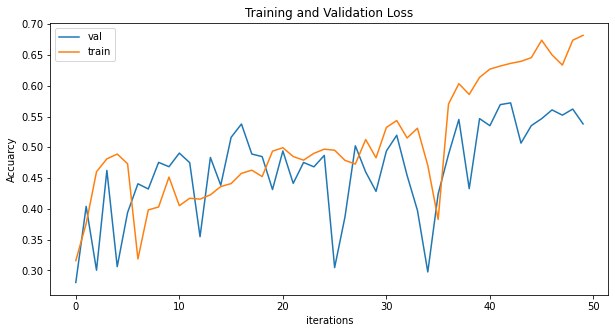

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(val_acc,label="val")
plt.plot(acc,label="train")
plt.xlabel("iterations")
plt.ylabel("Accuarcy")
plt.legend()
plt.show()

## Evaluate test data on sentiment classifier

In [ ]:
test = open('test.csv', "r+")

In [ ]:
file1 = open("myfile.txt","w+")

for i in test:
  text = i.split(',')[0]
  indexed_sentence = [TEXT.vocab.stoi[t] for t in text]
  tensor = torch.LongTensor(indexed_sentence).to(device)
  tensor = tensor.unsqueeze(1)

  text_lengths = torch.as_tensor(torch.as_tensor([len(text)]), dtype=torch.int64, device='cpu')
  predictions = torch.sigmoid(modelsenti(tensor, text_lengths))
  pred = predictions.item()
  i = i[:-1]
  if pred > 0.5:
    i += ",positive\n"
  else:
    i += ",negative\n"

  file1.write(i)

file1.seek(0)

0

# **Train a stance detection model and test our dataset on it**

## Import data and train the stance model

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

In [ ]:
train = open('traindata.txt', "r+")
test = open('testdata.txt', "r+")

In [ ]:
def create_df(trn):
  m_id = [1, 2, 3, 4, 7, 8, 9, 10]
  val_df = []
  trn_df = []
  df_lst = []

  for j in m_id:
    text_lst = []
    mid_lst = []
    senti_lst = []
    stance_lst = []
    dic = {}

    for i, val in enumerate(trn):
      if i != 0:
        splitted = val.split(',')
        if j == int(splitted[1]):
          senti = splitted[-1]
          if senti == "positive":
            senti = 1
          else:
            senti = 0
          text_lst.append(splitted[0])
          mid_lst.append(splitted[1])
          senti_lst.append(senti)
          stance_lst.append(splitted[2])

    dic["text"] = text_lst
    dic["m_id"] = mid_lst
    dic["sentiment"] = senti_lst
    dic["stance"] = stance_lst
    df = pd.DataFrame(data=dic)

    df_lst.append(df)
    trn.seek(0)

  return df_lst

In [ ]:
traindf= create_df(train)

In [ ]:
testdf = create_df(test)

In [ ]:
traindf[4].head()

,text,m_id,sentiment,stance
0,covid vaccin alter person dna,7,0,not_relevant
1,covid vaccin turn peopl catgirl,7,0,not_relevant
2,cdf rule covid vaccin moral accept receiv covi...,7,0,no_stance
3,covid vaccin chemtrail,7,0,not_relevant
4,pro lifer refrain url qt next question governo...,7,0,agree


In [ ]:
def preprocess_text(sen):

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
from sklearn import preprocessing
from keras.utils import to_categorical
from numpy import array
from numpy import asarray
from numpy import zeros

Xts, X2ts, yts = [], [], []

def generate_model(traindf, valdf):
  global X_train, y_train, X_tst, y_tst, X2_train, X2_tst
  global Xts, X2ts, yts
  X_train = []
  sentences = list(traindf["text"])
  for sen in sentences:
      X_train.append(preprocess_text(" ".join(sen)))

  y_train = traindf['stance']

  X_tst = []
  sentences = list(valdf["text"])
  for sen in sentences:
      X_tst.append(preprocess_text(" ".join(sen)))

  y_tst = valdf['stance']
  

  # label_encoder object knows how to understand word labels.
  label_encoder = preprocessing.LabelEncoder()

  # Encode labels in column 'species'.
  y_train = label_encoder.fit_transform(y_train)
  y_tst = label_encoder.fit_transform(y_tst)

  y_train = to_categorical(y_train)
  y_tst = to_categorical(y_tst)

  tokenizer = Tokenizer(num_words=5000)
  tokenizer.fit_on_texts(X_train)

  X_train = tokenizer.texts_to_sequences(X_train)
  X_tst = tokenizer.texts_to_sequences(X_tst)

  vocab_size = len(tokenizer.word_index) + 1
  maxlen = 200

  X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
  X_tst = pad_sequences(X_tst, padding='post', maxlen=maxlen)

  Xts.append(X_tst)
  yts.append(y_tst)

  embeddings_dictionary = dict()
  glove_file = open("glove.6B.100d.txt", 'r')

  for line in glove_file:
      records = line.split()
      word = records[0]
      vector_dimensions = asarray(records[1:], dtype='float32')
      embeddings_dictionary [word] = vector_dimensions

  glove_file.close()

  embedding_matrix = zeros((vocab_size, 100))
  for word, index in tokenizer.word_index.items():
      embedding_vector = embeddings_dictionary.get(word)
      if embedding_vector is not None:
          embedding_matrix[index] = embedding_vector

  X2_train = traindf["sentiment"].values
  X2_tst = valdf["sentiment"].values

  X2ts.append(X2_tst)

  maxlen = 200
  input_1 = Input(shape=(maxlen,))

  input_2 = Input(shape=(1,))

  embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_1)
  LSTM_Layer_1 = LSTM(128)(embedding_layer)

  dense_layer_1 = Dense(10, activation='relu')(input_2)
  dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)

  concat_layer = Concatenate()([LSTM_Layer_1, dense_layer_2])
  dense_layer_3 = Dense(10, activation='relu')(concat_layer)
  output = Dense(4, activation='softmax')(dense_layer_3)
  model = Model(inputs=[input_1, input_2], outputs=output)

  return model


In [ ]:
model_lst = []
history_lst = []

# from keras.utils import plot_model


for i in range(len(traindf)):
  model = generate_model(traindf[i], testdf[i])
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
  # plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)
  # break
  history = model.fit(x=[X_train, X2_train], y=y_train, batch_size=128, epochs=30, verbose=1, validation_split=0.2)
  model_lst.append(model)
  history_lst.append(history)

Epoch 1/30
2/2 [==============================] - 3s 481ms/step - loss: 1.3856 - acc: 0.3079 - val_loss: 1.3742 - val_acc: 0.3556
Epoch 2/30
2/2 [==============================] - 0s 62ms/step - loss: 1.3758 - acc: 0.3183 - val_loss: 1.3555 - val_acc: 0.3556
Epoch 3/30
2/2 [==============================] - 0s 59ms/step - loss: 1.3610 - acc: 0.3079 - val_loss: 1.3236 - val_acc: 0.3556
Epoch 4/30
2/2 [==============================] - 0s 58ms/step - loss: 1.3344 - acc: 0.3131 - val_loss: 1.2359 - val_acc: 0.3556
Epoch 5/30
2/2 [==============================] - 0s 59ms/step - loss: 1.2708 - acc: 0.3131 - val_loss: 1.1139 - val_acc: 0.3556
Epoch 6/30
2/2 [==============================] - 0s 57ms/step - loss: 1.2031 - acc: 0.3079 - val_loss: 1.0928 - val_acc: 0.3556
Epoch 7/30
2/2 [==============================] - 0s 56ms/step - loss: 1.1833 - acc: 0.3079 - val_loss: 1.0784 - val_acc: 0.3556
Epoch 8/30
2/2 [==============================] - 0s 58ms/step - loss: 1.1954 - acc: 0.3808 - va

In [ ]:
# import matplotlib.pyplot as plt

# for i in range(len(history_lst)):
#   plt.plot(history_lst[i].history['acc'])
#   plt.plot(history_lst[i].history['val_acc'])

#   plt.title('model accuracy')
#   plt.ylabel('accuracy')
#   plt.xlabel('epoch')
#   plt.legend(['train','test'], loc='upper left')
#   plt.show()

#   plt.plot(history_lst[i].history['loss'])
#   plt.plot(history_lst[i].history['val_loss'])

#   plt.title('model loss')
#   plt.ylabel('loss')
#   plt.xlabel('epoch')
#   plt.legend(['train','test'], loc='upper left')
#   plt.show()

## Finding stance for multiple tweets

In [ ]:
Xts = []
X2ts = []

def generate_partitioned_data(valdf):
  global X_tst, X2_tst
  global Xts, X2ts

  X_tst = []
  sentences = list(valdf["text"])
  for sen in sentences:
      X_tst.append(preprocess_text(" ".join(sen)))
  

  # label_encoder object knows how to understand word labels.
  label_encoder = preprocessing.LabelEncoder()

  tokenizer = Tokenizer(num_words=5000)
  tokenizer.fit_on_texts(X_tst)

  X_tst = tokenizer.texts_to_sequences(X_tst)

  vocab_size = len(tokenizer.word_index) + 1
  maxlen = 200

  X_tst = pad_sequences(X_tst, padding='post', maxlen=maxlen)
  Xts.append(X_tst)

  embeddings_dictionary = dict()
  glove_file = open("glove.6B.100d.txt", 'r')

  for line in glove_file:
      records = line.split()
      word = records[0]
      vector_dimensions = asarray(records[1:], dtype='float32')
      embeddings_dictionary [word] = vector_dimensions

  glove_file.close()

  embedding_matrix = zeros((vocab_size, 100))
  for word, index in tokenizer.word_index.items():
      embedding_vector = embeddings_dictionary.get(word)
      if embedding_vector is not None:
          embedding_matrix[index] = embedding_vector

  X2_tst = valdf["sentiment"].values

  X2ts.append(X2_tst)

In [ ]:
def create_df2(trn):
  m_id = [1, 2, 3, 4, 7, 8, 9, 10]
  df_lst = []

  for j in m_id:
    text_lst = []
    mid_lst = []
    senti_lst = []
    dic = {}

    for i, val in enumerate(trn):
      if i != 0:
        splitted = val.split(',')
        if j == int(splitted[1]):
          senti = splitted[-1]
          if senti == "positive\n":
            senti = 1
          else:
            senti = 0
          text_lst.append(splitted[0])
          mid_lst.append(splitted[1])
          senti_lst.append(senti)

    dic["text"] = text_lst
    dic["m_id"] = mid_lst
    dic["sentiment"] = senti_lst
    df = pd.DataFrame(data=dic)

    df_lst.append(df)
    trn.seek(0)

  return df_lst

In [ ]:
test = open('myfile.txt', "r+")
testdf = create_df2(test)

FileNotFoundError: ignored

In [ ]:
testdf[2].head()

In [ ]:
for i in range(len(testdf)):
  generate_partitioned_data(testdf[i])

test.seek(0)

In [ ]:
text_json = io.open('test_tweets.jsonl', mode='r', encoding='utf-8')

In [ ]:
import json
target = [1, 2, 3, 4, 7, 8, 9, 10]
classes = ["agree", "disagree", "no_stance", "not_relevant"]

text_python = extract_json(text_json)

dic = {}
count = 0
for line in text_python:
    id = line.get('id')
    text = line.get('text')
    text = clean_tweet(text)
    dic[text] = id

data = []
for j in range(len(testdf)):
  txt = testdf[j]['text'].values
  m_id = testdf[j]['m_id'].values
  text = testdf[j]['text'].values
  print("Misinformation Target:", target[j])
  for i in range(len(m_id)):
    t_id = dic[txt[i]]
    ind = target.index(int(m_id[i]))
    print(np.array([Xts[j][i]]), np.array([X2ts[j][i]]))
    pred = model_lst[ind].predict(x=[np.array([Xts[j][i]]), np.array([X2ts[j][i]])]).argmax(axis=-1)

    data.append({
        'tweet_id': t_id,
        'm_id': m_id[i],
        'stance': classes[pred[0]]
    })

with open('output.txt', 'w') as outfile:
    json.dump(data, outfile)

## Finding stance for single tweet

In [ ]:
text_json = io.open('test_tweets.jsonl', mode='r', encoding='utf-8')
test = open('myfile.txt', "r+")

In [ ]:
lines = test.read().split("\n")

import json
target = [1, 2, 3, 4, 7, 8, 9, 10]
classes = ["agree", "disagree", "no_stance", "not_relevant"]

text_python = extract_json(text_json)

dic = {}
count = 0
for line in text_python:
    id = line.get('id')
    text = line.get('text')
    text = clean_tweet(text)
    dic[text] = id

sentence, m_id, senti = lines[1].split(",")
p_text = [preprocess_text(" ".join(sentence))]

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(p_text)

X_tst = tokenizer.texts_to_sequences(p_text)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 200

X_tst = pad_sequences(X_tst, padding='post', maxlen=maxlen)

if senti == "negative":
  X2_tst = [0]
else:
  X2_tst = [1]

pred = model_lst[target.index(int(m_id))].predict(x=[np.array(X_tst), np.array(X2_tst)]).argmax(axis=-1)
print("Stance:", classes[pred[0]])

Stance: agree


## Find model accuracy for label test data

In [ ]:
target = [1, 2, 3, 4, 7, 8, 9, 10]
tot = 0
denom = 0

for j in range(len(testdf)):
  denom += len(testdf[j])
  m_id = testdf[j]['m_id'].values
  print("Misinformation Target:", target[j])
  for i in range(len(m_id)):
    ind = target.index(int(m_id[i]))
    score = model_lst[ind].evaluate(x=[np.array([Xts[j][i]]), np.array([X2ts[j][i]])], y=np.array([yts[j][i]]), verbose=1)
    tot += score[1]

print("Test Accuracy:", tot/denom)

Misinformation Target: 1
1/1 [==============================] - 0s 20ms/step - loss: 1.3096 - acc: 0.0000e+00
Misinformation Target: 2
1/1 [==============================] - 0s 20ms/step - loss: 1.5156 - acc: 0.0000e+00
Misinformation Target: 3
1/1 [==============================] - 0s 20ms/step - loss: 0.7519 - acc: 1.0000
Misinformation Target: 4
1/1 [==============================] - 0s 24ms/step - loss: 0.8863 - acc: 1.0000
Misinformation Target: 7
1/1 [==============================] - 0s 22ms/step - loss: 0.6752 - acc: 1.0000
Misinformation Target: 8
1/1 [==============================] - 0s 23ms/step - loss: 1.8278 - acc: 0.0000e+00
Misinformation Target: 9
1/1 [==============================] - 0s 20ms/step - loss: 1.3961 - acc: 0.0000e+00
Misinformation Target: 10
1/1 [==============================] - 0s 21ms/step - loss: 1.2638 - acc: 0.0000e+00
Test Accuracy: 0.4025
